In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "text.usetex": True,              # If you want to use LaTeX fonts in text
    "font.family": "serif",           # IEEE uses Times New Roman-like fonts
    "font.size": 12,                   # General font size for IEEE format
    "axes.labelsize": 12,              # Axis labels font size
    "legend.fontsize": 11,             # Legend font size
    "xtick.labelsize": 11,             # X-axis tick labels font size
    "ytick.labelsize": 11,             # Y-axis tick labels font size
    "figure.figsize": (5, 5*0.8),
    "savefig.dpi": 1200,               # DPI for high-quality PNG/JPEG
})

In [2]:
results = pd.read_excel("results.xlsx", header=[0,1], index_col=0)

# COMPLEXIDADE - NUMERO OPS

**simulated annealing**

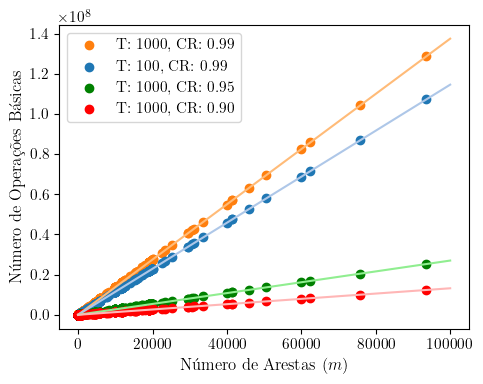

In [3]:
alg = "Simulated "
metrics = "#ops"
size = "m"
colors_scatter = ["#ff7f0e", "#1f77b4", "green", "red"]
colors_plot = ["#ffbb78", "#aec7e8", "lightgreen", "#FFB6B6"]

a = -1
for h1, h2 in results.columns:
    if h2 == "#ops" and alg in h1:
        a += 1
        T = int(h1.replace(",", "").split()[3])
        CR = float(h1.replace(")", "").split()[5])

        x = results[("Graph", size)]
        y = results[(h1, h2)]
        sorted_points = sorted(zip(x, y))  # Create tuples and sort by x
        x_sorted, y_sorted = zip(*sorted_points)  # Unzip into two sorted lists
        if h1 == "Simulated Annealing (T: 1000, CR: 0.9)":
            h1 = "Simulated Annealing (T: 1000, CR: 0.90)"
        plt.scatter(x, y, label=f"{h1[21:-1]}", color = colors_scatter[a])

        x = np.linspace(0, 10**5)
        K = np.ceil(np.log(10**-3 / T) / np.log(CR))
        y = x * K
        plt.plot(x, y, color = colors_plot[a])
#plt.xlabel(f"{size}")
#plt.ylabel(f"{metrics}"[1:])
plt.legend()
#plt.xscale("log")

#plt.title("Simulated Annealing")
plt.ylabel(r"Número de Operações Básicas")
plt.xlabel(r"Número de Arestas ($m$)")
plt.tight_layout()
plt.savefig(f"assets/ops_{alg}.png", transparent=True)
plt.show()

**random random**

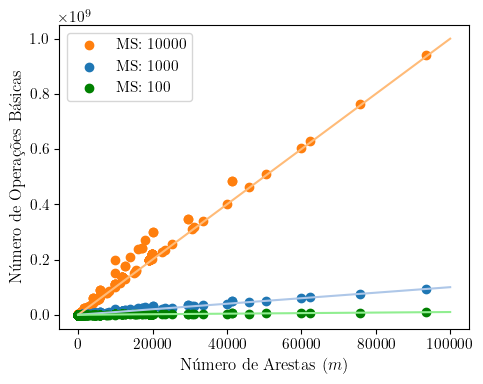

In [4]:
alg = "Random Sol"
metrics = "#ops"
size = "m"
colors_scatter = ["#ff7f0e", "#1f77b4", "green", "red"]
colors_plot = ["#ffbb78", "#aec7e8", "lightgreen", "#FFB6B6"]

a = -1
for h1, h2 in results.columns:
    if h2 == "#ops" and alg in h1:
        a += 1
        MS = int(h1.replace(")", "").split()[3])

        x = results[("Graph", size)]
        y = results[(h1, h2)]
        sorted_points = sorted(zip(x, y))  # Create tuples and sort by x
        x_sorted, y_sorted = zip(*sorted_points)  # Unzip into two sorted lists
        plt.scatter(x, y, label=f"{h1[18:-1]}", color = colors_scatter[a])

        x = np.linspace(0, 10**5)
        y = MS * x 
        plt.plot(x, y, color = colors_plot[a])

plt.legend()
#plt.xscale("log")
#plt.yscale("log")

#plt.title("random solution ")
plt.ylabel(r"Número de Operações Básicas")
plt.xlabel(r"Número de Arestas ($m$)")
plt.tight_layout()
plt.savefig(f"assets/ops_{alg}.png", transparent=True)
plt.show()

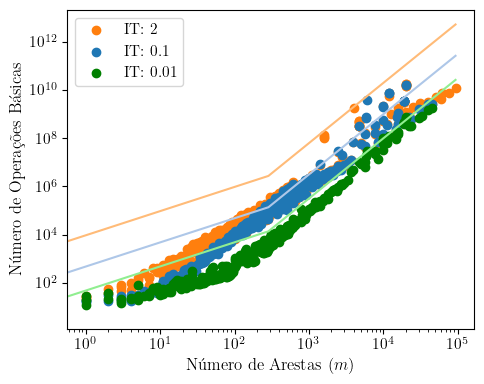

In [5]:
alg = "Random Greedy"
metrics = "#ops"
size = "m"
colors_scatter = ["#ff7f0e", "#1f77b4", "green", "red"]
colors_plot = ["#ffbb78", "#aec7e8", "lightgreen", "#FFB6B6"]

a = -1
for h1, h2 in results.columns:
    if h2 == "#ops" and alg in h1:
        a += 1
        itlim = float(h1.replace(")", "").split()[3])


        x = results[("Graph", size)]
        y = results[(h1, h2)]
        sorted_points = sorted(zip(x, y))  # Create tuples and sort by x
        x_sorted, y_sorted = zip(*sorted_points)  # Unzip into two sorted lists
        plt.scatter(x_sorted, y_sorted, label=f"{h1[15:-1]}", color = colors_scatter[a], alpha=1)

        n = results[("Graph", "n")]
        x = np.linspace(0, max(x), len(x))
        #y = x**2 * itlim * n
        y = (x**2.5 ) * itlim

        plt.plot(x, y, color = colors_plot[a])
#plt.title(f"{alg}")
#plt.xlabel(f"{size}")
#plt.ylabel(f"{metrics}"[1:])
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"Número de Operações Básicas")
plt.xlabel(r"Número de Arestas ($m$)")
plt.tight_layout()
plt.savefig(f"assets/ops_{alg}.png", transparent=True)
plt.show()

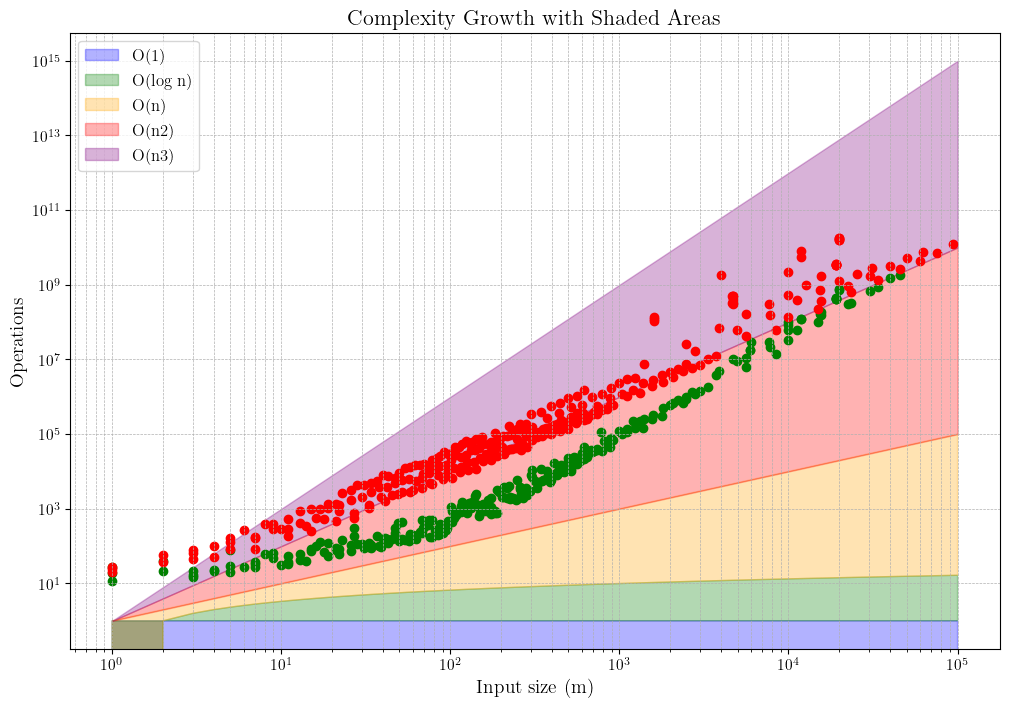

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate input sizes
n = np.arange(1, 10**5)  # Input size from 1 to 1000

# Define complexity functions
constant = np.ones_like(n)        # O(1)
logarithmic = np.log2(n)          # O(log n)
linear = n                        # O(n)
quadratic = n**2                  # O(n^2)
cubic = n**3                      # O(n^3)
#fourth = n**4                     # O(n^3)
#fifth = n**5                      # O(n^3)

# Create the plot
plt.figure(figsize=(12, 8))

# Fill areas between curves
plt.fill_between(n, 0, constant, alpha=0.3, label="O(1)", color="blue")
plt.fill_between(n, constant, logarithmic, alpha=0.3, label="O(log n)", color="green")
plt.fill_between(n, logarithmic, linear, alpha=0.3, label="O(n)", color="orange")
plt.fill_between(n, linear, quadratic, alpha=0.3, label="O(n2)", color="red")
plt.fill_between(n, quadratic, cubic, alpha=0.3, label="O(n3)", color="purple")
#plt.fill_between(n, cubic, fourth, alpha=0.3, label="O(n4)", color="blue")
#plt.fill_between(n, fourth, fifth, alpha=0.3, label="O(n5)", color="black")

x = results[("Graph", "m")]
y = results[("Random Greedy (IT: 0.01)", "#ops")]
plt.scatter(x, y, color = colors_scatter[a])

x = results[("Graph", "m")]
y = results[("Random Greedy (IT: 2)", "#ops")]
plt.scatter(x, y, color = colors_scatter[a+1])

# Customize the plot
#plt.xscale('log')  # Logarithmic scale for x-axis
plt.xscale('log')  # Logarithmic scale for y-axis
plt.yscale('log')
plt.xlabel("Input size (m)", fontsize=14)
plt.ylabel("Operations", fontsize=14)
plt.title("Complexity Growth with Shaded Areas", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.show() # ESTÁ A DAR N^4 MAS DEVIA SER 5........


# AJUSTAR REGRESSOES AUTMATOCIAS

---
---
---

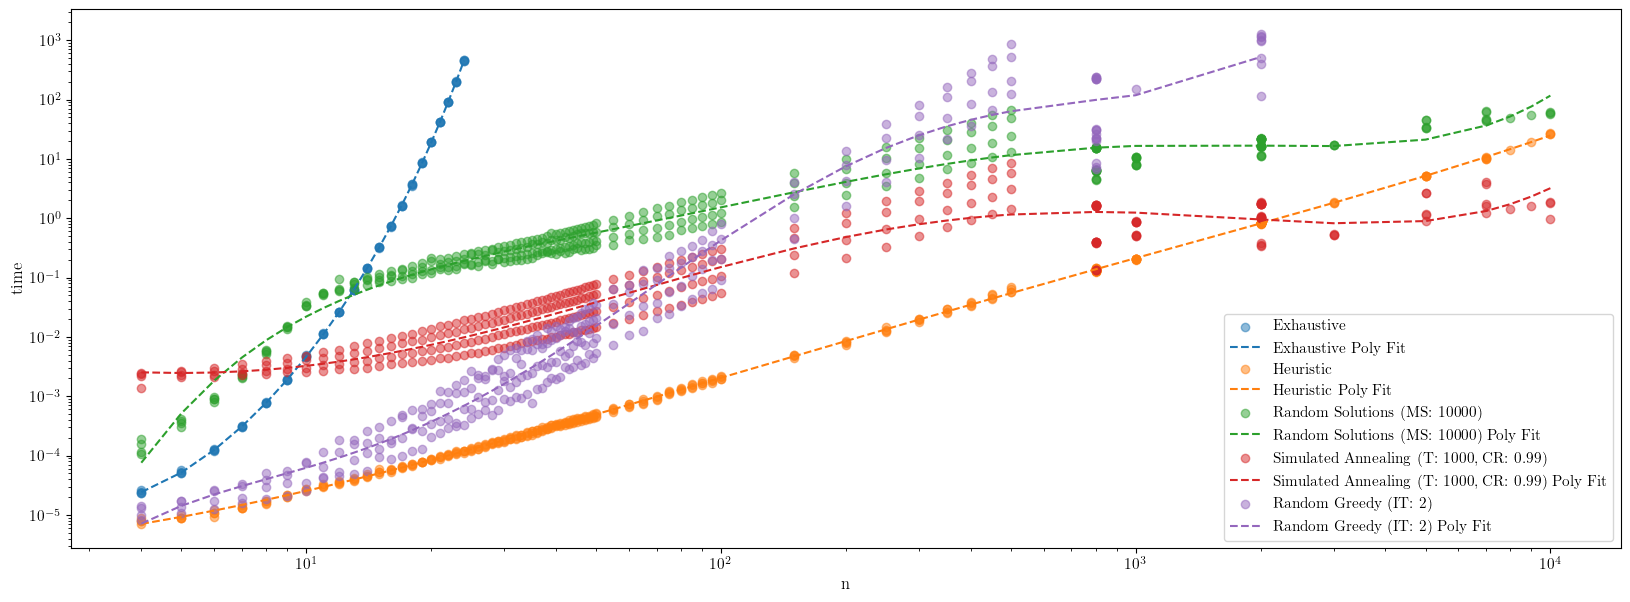

In [7]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(20, 7))

head1 = ["Exhaustive",
         "Heuristic",
         "Random Solutions (MS: 10000)",
         "Simulated Annealing (T: 1000, CR: 0.99)",
         "Random Greedy (IT: 2)"]

h2 = "time"
xlab = "n"

for h1 in head1:
    x = results[("Graph", xlab)].values
    y = results[(h1, h2)].values

    # Remove NaN values
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask].reshape(-1, 1)
    y_clean = y[mask]

    # Scatter plot
    plt.scatter(x_clean, y_clean, label=f"{h1}", alpha=0.5)

    if len(x_clean) > 0:
        # Polynomial Regression fit (degree 2)
        poly = PolynomialFeatures(degree=5)
        x_poly = poly.fit_transform(np.log(x_clean))

        model = LinearRegression()
        model.fit(x_poly, np.log(y_clean))
        y_pred = np.exp(model.predict(x_poly))

        # Sort the data for smooth plotting
        sorted_indices = np.argsort(x_clean.ravel())
        x_sorted = x_clean[sorted_indices]
        y_sorted = y_pred[sorted_indices]

        # Plot best-fit curve
        plt.plot(x_sorted, y_sorted, linestyle="--", label=f"{h1} Poly Fit")

plt.xscale("log")
plt.yscale("log")
plt.ylabel(h2)
plt.xlabel(xlab)
plt.legend()
plt.show()


Regression results for Random Sol. (MS: 10000):
  Coefficients: [ 0.          3.72393163 -0.23552201]
  Intercept: -11.470593208281743
  R-squared: 0.9342302566315802

--------------------------------------------------

Regression results for SA (T: 1000, CR: 0.99):
  Coefficients: [ 0.          2.4709671  -0.13278871]
  Intercept: -10.76709320911812
  R-squared: 0.8786457867805822

--------------------------------------------------

Regression results for Random Greedy (IT: 2):
  Coefficients: [ 0.          4.08177748 -0.07800488]
  Intercept: -18.86427598038987
  R-squared: 0.9510152508734209

--------------------------------------------------



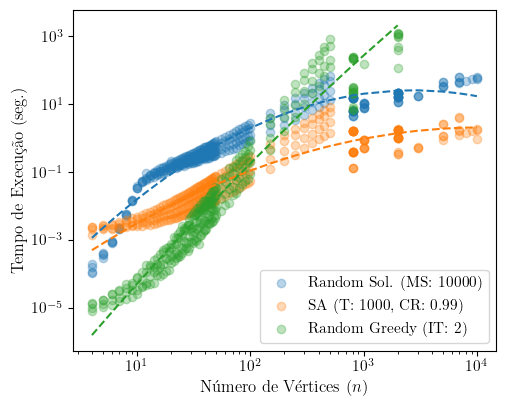

In [8]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


head1 = ["Exhaustive",
         "Heuristic",
         "Random Solutions (MS: 10000)",
         "Simulated Annealing (T: 1000, CR: 0.99)",
         "Random Greedy (IT: 2)"]

head1 = ["Random Solutions (MS: 10000)", "Simulated Annealing (T: 1000, CR: 0.99)", "Random Greedy (IT: 2)"]

h2 = "time"
xlab = "n"

for h1 in head1:
    x = results[("Graph", xlab)].values
    y = results[(h1, h2)].values

    # Remove NaN and non-positive values in x (since log(x) is undefined for x <= 0)
    mask = ~np.isnan(x) & ~np.isnan(y) & (x > 0) & (y > 0) #& (x < 10**2.9)
    x_clean = x[mask].reshape(-1, 1)
    y_clean = y[mask]

    # Scatter plot

    if "Simulated" in h1:
        h1 = h1.replace("Simulated Annealing", "SA")
    elif "Solut" in h1:
        h1 = h1.replace("Solutions", "Sol.")
    plt.scatter(x_clean, y_clean, label=f"{h1}", alpha=0.3)

    if len(x_clean) > 0:
        # Polynomial Regression fit (degree 5)
        if h1 == "Random Greedy (IT: 2)":
            poly = PolynomialFeatures(degree=2)
        else:
            poly = PolynomialFeatures(degree=2)
        x_poly = poly.fit_transform(np.log(x_clean))

        model = LinearRegression()
        model.fit(x_poly, np.log(y_clean))
        y_pred = np.exp(model.predict(x_poly))

        # Print regression results
        print(f"Regression results for {h1}:")
        print(f"  Coefficients: {model.coef_}")
        print(f"  Intercept: {model.intercept_}")
        
        # Calculate R-squared score (goodness of fit)
        r2_score = model.score(x_poly, np.log(y_clean))
        print(f"  R-squared: {r2_score}")
        
        print("\n" + "-"*50 + "\n")

        # Handle infinities or overly large predictions by setting a cap
        y_pred = np.nan_to_num(y_pred, nan=np.inf, posinf=np.inf, neginf=0)

        # Sort the data for smooth plotting
        sorted_indices = np.argsort(x_clean.ravel())
        x_sorted = x_clean[sorted_indices]
        y_sorted = y_pred[sorted_indices]

        # Plot best-fit curve
        plt.plot(x_sorted, y_sorted, linestyle="--")

plt.xscale("log")
plt.yscale("log")
#plt.ylabel(h2)
#plt.xlabel(xlab)
plt.legend()

plt.tight_layout()
plt.xlabel(r"Número de Vértices ($n$)")
plt.ylabel(r"Tempo de Execução (seg.)")
plt.show()


# plot complexidades

In [9]:
n**2

array([         1,          4,          9, ..., 9999400009, 9999600004,
       9999800001])

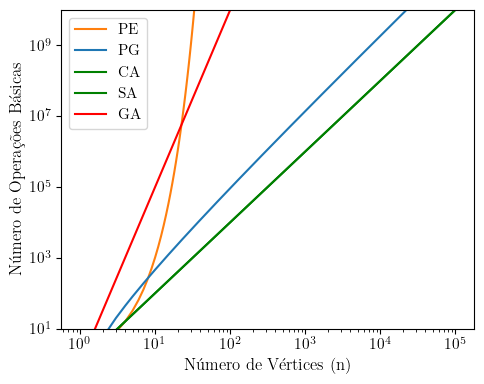

In [10]:
alg = ["PE", "PG", "CA", "SA", "GA"]
n = [np.arange(1, 10**1.8), np.arange(1, 10**5), np.arange(1, 10**5), np.arange(1, 10**5), np.arange(1, 10**3)]  
comp = [2**n[0],
        n[1]**2 * np.log(n[1]**2),
        n[2]**2,
        n[3]**2,
        (n[4]**2)**2 * n[4]]
colors = ["#ff7f0e", "#1f77b4", "green", "green", "red"]

for i in range(len(alg)):
    plt.plot(n[i], comp[i], label=alg[i], color=colors[i])

plt.xscale("log")
plt.yscale("log")
plt.ylim(10, 10**10)
plt.legend()
plt.xlabel("Número de Vértices (n)")
plt.ylabel("Número de Operações Básicas")

plt.tight_layout()
plt.savefig("assets/basicops.png", transparent=True)
plt.show()


# tabela precisoes

In [11]:
dicio_Prec = {"name": [], "gpeq":[], "gset":[], "name2": []}


GSET = results[results[("Graph", "name")].str[-1] == "t"]
for h1, h2 in results.columns:
    if h2 == "prec.":
        dicio_Prec["name"].append(h1)
        a = np.round( (GSET[(h1, h2)] * 100).mean(), 0 ).astype(str)[:-2]
        a += "% ("
        a += np.round( (GSET[(h1, h2)] * 100).std(), 1 ).astype(str)
        a += ")"
        dicio_Prec["gset"].append(a)


GPeq = results[results[("Graph", "name")].str[-1] == "l"]
for h1, h2 in results.columns:
    if h2 == "prec.":
        dicio_Prec["name2"].append(h1)
        a = np.round( (GPeq[(h1, h2)] * 100).mean(), 0 ).astype(str)[:-2]
        a += "% ("
        a += np.round( (GPeq[(h1, h2)] * 100).std(), 1 ).astype(str)
        a += ")"
        dicio_Prec["gpeq"].append(a)

if dicio_Prec["name"] == dicio_Prec["name2"]:
    dicio_Prec.pop("name2")
else:
    print("ERROR HUSAIFHAIUSHFIUDSHFIUDSHFIUS")
pd.DataFrame(dicio_Prec)

,name,gpeq,gset
0,Heuristic,93% (6.9),61% (23.1)
1,Random Solutions (MS: 10000),98% (2.4),43% (34.6)
2,"Simulated Annealing (T: 1000, CR: 0.99)",99% (1.3),59% (28.5)
3,Random Greedy (IT: 2),96% (3.7),88% (8.4)
4,"Simulated Annealing (T: 100, CR: 0.99)",99% (1.3),58% (28.7)
5,Random Greedy (IT: 0.1),84% (12.4),90% (7.7)
6,Random Solutions (MS: 1000),96% (4.5),42% (35.0)
7,"Simulated Annealing (T: 1000, CR: 0.95)",98% (2.6),44% (34.4)
8,Random Solutions (MS: 100),92% (6.3),41% (35.6)
9,"Simulated Annealing (T: 1000, CR: 0.9)",97% (3.1),40% (36.1)


# plot #sols

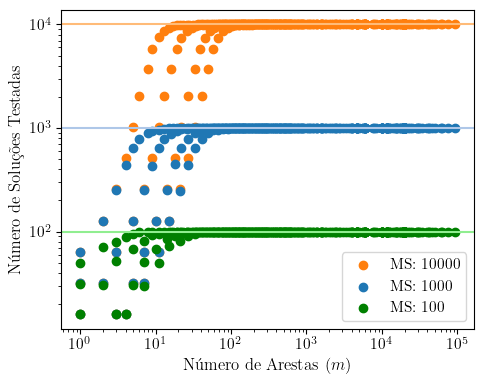

In [12]:
alg = "Random Sol"
colors_scatter = ["#ff7f0e", "#1f77b4", "green", "red"]
colors_plot = ["#ffbb78", "#aec7e8", "lightgreen", "#FFB6B6"]

a = -1
for h1, h2 in results.columns:
    if h2 == "#sols" and alg in h1:
        a += 1
        MS = int(h1.replace(")", "").split()[3])

        x = results[("Graph", "m")]
        y = results[(h1, h2)]
        sorted_points = sorted(zip(x, y))  # Create tuples and sort by x
        x_sorted, y_sorted = zip(*sorted_points)  # Unzip into two sorted lists
        plt.scatter(x, y, label=f"{h1[18:-1]}", color = colors_scatter[a])

       
        # horizontal line
        plt.axhline(y=MS, color = colors_plot[a])


plt.legend()
plt.xscale("log")
plt.yscale("log")

#plt.title("random solution ")
plt.ylabel(r"Número de Soluções Testadas")
plt.xlabel(r"Número de Arestas ($m$)")
plt.tight_layout()
plt.savefig(f"assets/sols_{alg}.png", transparent=True)
plt.show()

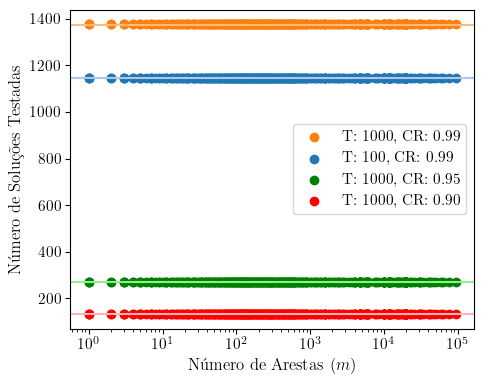

In [13]:
alg = "Simulated "
metrics = "#sols"
size = "m"
colors_scatter = ["#ff7f0e", "#1f77b4", "green", "red"]
colors_plot = ["#ffbb78", "#aec7e8", "lightgreen", "#FFB6B6"]

a = -1
for h1, h2 in results.columns:
    if h2 == "#sols" and alg in h1:
        a += 1
        T = int(h1.replace(",", "").split()[3])
        CR = float(h1.replace(")", "").split()[5])

        x = results[("Graph", size)]
        y = results[(h1, h2)]
        sorted_points = sorted(zip(x, y))  # Create tuples and sort by x
        x_sorted, y_sorted = zip(*sorted_points)  # Unzip into two sorted lists
        if h1 == "Simulated Annealing (T: 1000, CR: 0.9)":
            h1 = "Simulated Annealing (T: 1000, CR: 0.90)"
        plt.scatter(x, y, label=f"{h1[21:-1]}", color = colors_scatter[a])

        K = np.ceil(np.log(10**-3 / T) / np.log(CR))
        # horizontal line
        plt.axhline(y=K, color = colors_plot[a])

#plt.xlabel(f"{size}")
#plt.ylabel(f"{metrics}"[1:])
plt.legend()
plt.xscale("log")

#plt.title("Simulated Annealing")
plt.ylabel(r"Número de Soluções Testadas")
plt.xlabel(r"Número de Arestas ($m$)")
plt.tight_layout()
plt.savefig(f"assets/sols_{alg}.png", transparent=True)
plt.show()

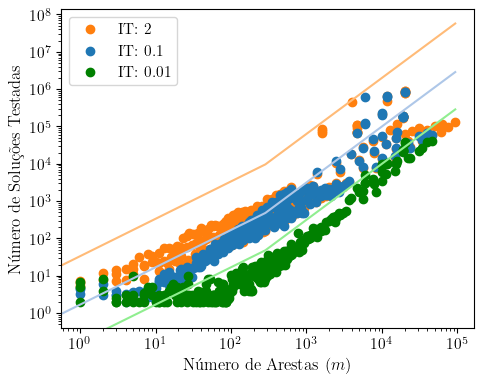

In [14]:
alg = "Random Greedy"
colors_scatter = ["#ff7f0e", "#1f77b4", "green", "red"]
colors_plot = ["#ffbb78", "#aec7e8", "lightgreen", "#FFB6B6"]

a = -1
for h1, h2 in results.columns:
    if h2 == "#sols" and alg in h1:
        a += 1
        itlim = float(h1.replace(")", "").split()[3])


        x = results[("Graph", "m")]
        y = results[(h1, h2)]
        sorted_points = sorted(zip(x, y))  # Create tuples and sort by x
        x_sorted, y_sorted = zip(*sorted_points)  # Unzip into two sorted lists
        plt.scatter(x_sorted, y_sorted, label=f"{h1[15:-1]}", color = colors_scatter[a], alpha=1)

        x = np.linspace(0, max(x), len(x))
        plt.plot(x, x**1.5* itlim, color = colors_plot[a])

#plt.title(f"{alg}")
#plt.xlabel(f"{size}")
#plt.ylabel(f"{metrics}"[1:])
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"Número de Soluções Testadas")
plt.xlabel(r"Número de Arestas ($m$)")
plt.tight_layout()
plt.savefig(f"assets/sols_{alg}.png", transparent=True)
plt.show()

# TEMPO

Regression results for Corte Aleatório (MS: 10000):
  Coefficients: [ 0.          3.72393163 -0.23552201]
  Intercept: -11.470593208281743
  R-squared: 0.9342302566315802

--------------------------------------------------

Regression results for SA (T: 1000, CR: 0.99):
  Coefficients: [ 0.          2.4709671  -0.13278871]
  Intercept: -10.76709320911812
  R-squared: 0.8786457867805822

--------------------------------------------------

Regression results for Guloso Aleatório (IT: 2):
  Coefficients: [ 0.          4.08177748 -0.07800488]
  Intercept: -18.86427598038987
  R-squared: 0.9510152508734209

--------------------------------------------------



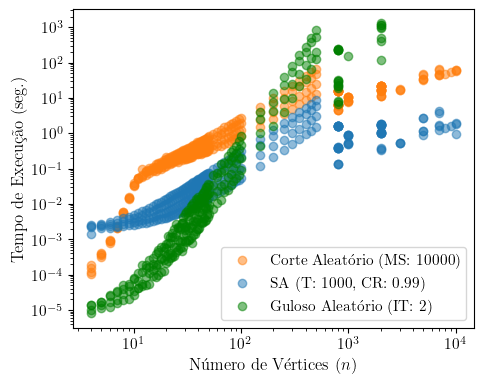

In [17]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


head1 = ["Exhaustive",
         "Heuristic",
         "Random Solutions (MS: 10000)",
         "Simulated Annealing (T: 1000, CR: 0.99)",
         "Random Greedy (IT: 2)"]

head1 = ["Random Solutions (MS: 10000)", "Simulated Annealing (T: 1000, CR: 0.99)", "Random Greedy (IT: 2)"]

h2 = "time"
xlab = "n"
colors_scatter = ["#ff7f0e", "#1f77b4", "green", "red"]
a = -1
for h1 in head1:
    a+=1
    x = results[("Graph", xlab)].values
    y = results[(h1, h2)].values

    # Remove NaN and non-positive values in x (since log(x) is undefined for x <= 0)
    mask = ~np.isnan(x) & ~np.isnan(y) & (x > 0) & (y > 0) #& (x < 10**2.9)
    x_clean = x[mask].reshape(-1, 1)
    y_clean = y[mask]

    # Scatter plot

    if "Simulated" in h1:
        h1 = h1.replace("Simulated Annealing", "SA")
    elif "Solut" in h1:
        h1 = h1.replace("Random Solutions", "Corte Aleatório")   
    else:
        h1 = h1.replace("Random Greedy", "Guloso Aleatório")
        
    plt.scatter(x_clean, y_clean, label=f"{h1}", alpha=0.5, color = colors_scatter[a])

    if len(x_clean) > 0:
        # Polynomial Regression fit (degree 5)
        if h1 == "Random Greedy (IT: 2)":
            poly = PolynomialFeatures(degree=5)
        else:
            poly = PolynomialFeatures(degree=2)
        x_poly = poly.fit_transform(np.log(x_clean))

        model = LinearRegression()
        model.fit(x_poly, np.log(y_clean))
        y_pred = np.exp(model.predict(x_poly))

        # Print regression results
        print(f"Regression results for {h1}:")
        print(f"  Coefficients: {model.coef_}")
        print(f"  Intercept: {model.intercept_}")
        
        # Calculate R-squared score (goodness of fit)
        r2_score = model.score(x_poly, np.log(y_clean))
        print(f"  R-squared: {r2_score}")
        
        print("\n" + "-"*50 + "\n")

        # Handle infinities or overly large predictions by setting a cap
        y_pred = np.nan_to_num(y_pred, nan=np.inf, posinf=np.inf, neginf=0)

        # Sort the data for smooth plotting
        sorted_indices = np.argsort(x_clean.ravel())
        x_sorted = x_clean[sorted_indices]
        y_sorted = y_pred[sorted_indices]

        # Plot best-fit curve
        #plt.plot(x_sorted, y_sorted, linestyle="--")

plt.xscale("log")
plt.yscale("log")
#plt.ylabel(h2)
#plt.xlabel(xlab)
plt.legend()

plt.tight_layout()
plt.xlabel(r"Número de Vértices ($n$)")
plt.ylabel(r"Tempo de Execução (seg.)")
plt.tight_layout()
plt.savefig("assets/time_all.png", transparent=True)
plt.show()


Regression results for Corte Aleatório (MS: 10000):
  Coefficients: [0.         0.69834424 0.1045296 ]
  Intercept: -4.984066331471183
  R-squared: 0.9487039371339259

--------------------------------------------------

Regression results for SA (T: 1000, CR: 0.99):
  Coefficients: [0.         0.73247278 0.13177573]
  Intercept: -8.221008940134926
  R-squared: 0.8993100676965862

--------------------------------------------------

Regression results for Guloso Aleatório (IT: 2):
  Coefficients: [0.         2.63229859 0.1726561 ]
  Intercept: -17.1689911267558
  R-squared: 0.964742999019402

--------------------------------------------------



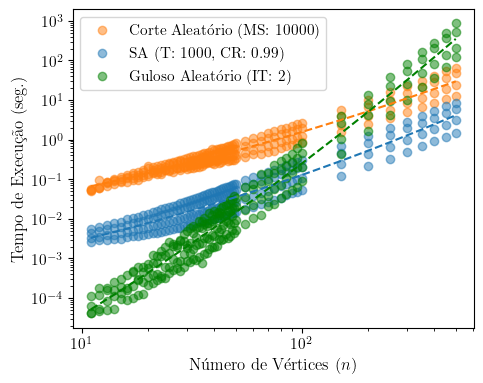

In [24]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

colors_scatter = ["#ff7f0e", "#1f77b4", "green", "red"]
colors_plot = ["#ffbb78", "#aec7e8", "lightgreen", "#FFB6B6"]

head1 = ["Exhaustive",
         "Heuristic",
         "Random Solutions (MS: 10000)",
         "Simulated Annealing (T: 1000, CR: 0.99)",
         "Random Greedy (IT: 2)"]

head1 = ["Random Solutions (MS: 10000)", "Simulated Annealing (T: 1000, CR: 0.99)", "Random Greedy (IT: 2)"]

h2 = "time"
xlab = "n"

a = -1
for h1 in head1:
    a += 1
    x = results[("Graph", xlab)].values
    y = results[(h1, h2)].values

    # Remove NaN and non-positive values in x (since log(x) is undefined for x <= 0)
    mask = ~np.isnan(x) & ~np.isnan(y) & (x > 0) & (y > 0) & (x < 10**2.9) & (x > 10**1)
    x_clean = x[mask].reshape(-1, 1)
    y_clean = y[mask]

    # Scatter plot

    if "Simulated" in h1:
        h1 = h1.replace("Simulated Annealing", "SA")
    elif "Solut" in h1:
        h1 = h1.replace("Random Solutions", "Corte Aleatório")   
    else:
        h1 = h1.replace("Random Greedy", "Guloso Aleatório")
        
    plt.scatter(x_clean, y_clean, label=f"{h1}", alpha=0.5, color = colors_scatter[a])

    if len(x_clean) > 0:
        # Polynomial Regression fit (degree 5)
        if h1 == "Random Greedy (IT: 2)":
            poly = PolynomialFeatures(degree=5)
        else:
            poly = PolynomialFeatures(degree=2)
        x_poly = poly.fit_transform(np.log(x_clean))

        model = LinearRegression()
        model.fit(x_poly, np.log(y_clean))
        y_pred = np.exp(model.predict(x_poly))

        # Print regression results
        print(f"Regression results for {h1}:")
        print(f"  Coefficients: {model.coef_}")
        print(f"  Intercept: {model.intercept_}")
        
        # Calculate R-squared score (goodness of fit)
        r2_score = model.score(x_poly, np.log(y_clean))
        print(f"  R-squared: {r2_score}")
        
        print("\n" + "-"*50 + "\n")

        # Handle infinities or overly large predictions by setting a cap
        y_pred = np.nan_to_num(y_pred, nan=np.inf, posinf=np.inf, neginf=0)

        # Sort the data for smooth plotting
        sorted_indices = np.argsort(x_clean.ravel())
        x_sorted = x_clean[sorted_indices]
        y_sorted = y_pred[sorted_indices]

        # Plot best-fit curve
        plt.plot(x_sorted, y_sorted, linestyle="--", color = colors_scatter[a])

plt.xscale("log")
plt.yscale("log")
#plt.ylabel(h2)
#plt.xlabel(xlab)
plt.legend()

plt.tight_layout()
plt.xlabel(r"Número de Vértices ($n$)")
plt.ylabel(r"Tempo de Execução (seg.)")
plt.tight_layout()
plt.savefig("assets/time_interval.png", transparent=True)
plt.show()
